# D214 Capstone
# Modeling Inflation Adusted Recessionary Lumber Prices
# July 1981 - November 1982 Recession
## Eric Yarger

# Import Packages

In [1]:
# Import Initial Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels
import datetime
import platform
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy import signal
from pmdarima.arima import StepwiseContext
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

### Environment

In [2]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : not installed
jupyter_client   : 7.3.5
jupyter_core     : 4.10.0
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [3]:
# Python Version
print(platform.python_version())

3.7.13


In [4]:
#Load Medical Dataset 
df = pd.read_csv('C:/Users/ericy/Desktop/lumber_trading_days_adj.csv')

# Data Selection for Analysis

In [5]:
#------ Select Data Set for Recession
df = df[1664:2525]

In [6]:
df

,Date,Trading Days,2022_Value,Value
1664,1979-07-05,1665,949.520,228.8
1665,1979-07-06,1666,938.730,226.2
1666,1979-07-09,1667,934.580,225.2
1667,1979-07-10,1668,940.390,226.6
1668,1979-07-11,1669,952.840,229.6
...,...,...,...,...
2520,1982-11-24,2521,493.190,165.5
2521,1982-11-26,2522,507.792,170.4
2522,1982-11-29,2523,504.216,169.2
2523,1982-11-30,2524,497.362,166.9


# D1: Exploratory Data Analysis

In [7]:
df = df[['Trading Days','2022_Value']]

In [8]:
df

,Trading Days,2022_Value
1664,1665,949.520
1665,1666,938.730
1666,1667,934.580
1667,1668,940.390
1668,1669,952.840
...,...,...
2520,2521,493.190
2521,2522,507.792
2522,2523,504.216
2523,2524,497.362


# EDA

In [9]:
df.head()

,Trading Days,2022_Value
1664,1665,949.52
1665,1666,938.73
1666,1667,934.58
1667,1668,940.39
1668,1669,952.84


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 1664 to 2524
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trading Days  861 non-null    int64  
 1   2022_Value    861 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.6 KB


In [11]:
df.shape

(861, 2)

In [12]:
df.describe()

,Trading Days,2022_Value
count,861.000000,861.000000
mean,2095.000000,627.133584
std,248.693587,195.485514
min,1665.000000,373.394000
25%,1880.000000,453.556000
50%,2095.000000,599.438000
75%,2310.000000,740.778000
max,2525.000000,1182.335000


In [13]:
df.isnull().any()

Trading Days    False
2022_Value      False
dtype: bool

## Line Graph Visualization

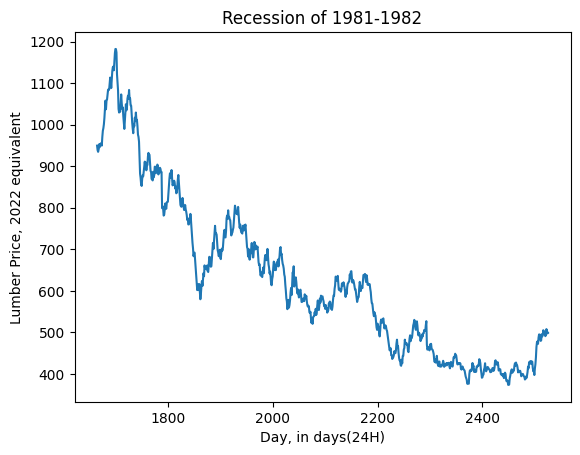

In [14]:
#-------
plt.plot(df['Trading Days'],df['2022_Value'])
plt.title('Recession of 1981-1982')
plt.xlabel('Day, in days(24H)')
plt.ylabel('Lumber Price, 2022 equivalent')
plt.show()

# Data Cleaning

In [15]:
# Drop any null columns
df = df.dropna()

# D2: Time Step Formatting, Indexing



### Set df['Trading Days'] to Index

In [16]:
# Day to datetime
df['Trading Days'] = pd.to_datetime(df['Trading Days'], unit='D')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 1664 to 2524
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Trading Days  861 non-null    datetime64[ns]
 1   2022_Value    861 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.2 KB


In [18]:
# Set Day as Index
df.set_index('Trading Days',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 861 entries, 1974-07-24 to 1976-11-30
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2022_Value  861 non-null    float64
dtypes: float64(1)
memory usage: 13.5 KB


In [20]:
df

,2022_Value
Trading Days,
1974-07-24,949.520
1974-07-25,938.730
1974-07-26,934.580
1974-07-27,940.390
1974-07-28,952.840
...,...
1976-11-26,493.190
1976-11-27,507.792
1976-11-28,504.216


# D3 Stationarity Analysis
### Augmented Dickey Fuller (ADF) Test
### Assess stationarity of dataset

In [21]:
# Code Reference (Making time series stationary | Python, n.d.)
dicky_fuller_test = adfuller(df)

In [22]:
dicky_fuller_test

(-1.5443808173621811,
 0.5114538150396029,
 1,
 859,
 {'1%': -3.437985563419411,
  '5%': -2.864910527649228,
  '10%': -2.5685647265209433},
 6527.844611650443)

In [23]:
# Results show p = .51145
# Data does not reject null hypothesis at p < .05
# Therefore, Time series is determined to be non-stationary

# D4 Differencing
## 1st and 2nd order Differencing
### finding 'd' for ARIMA model

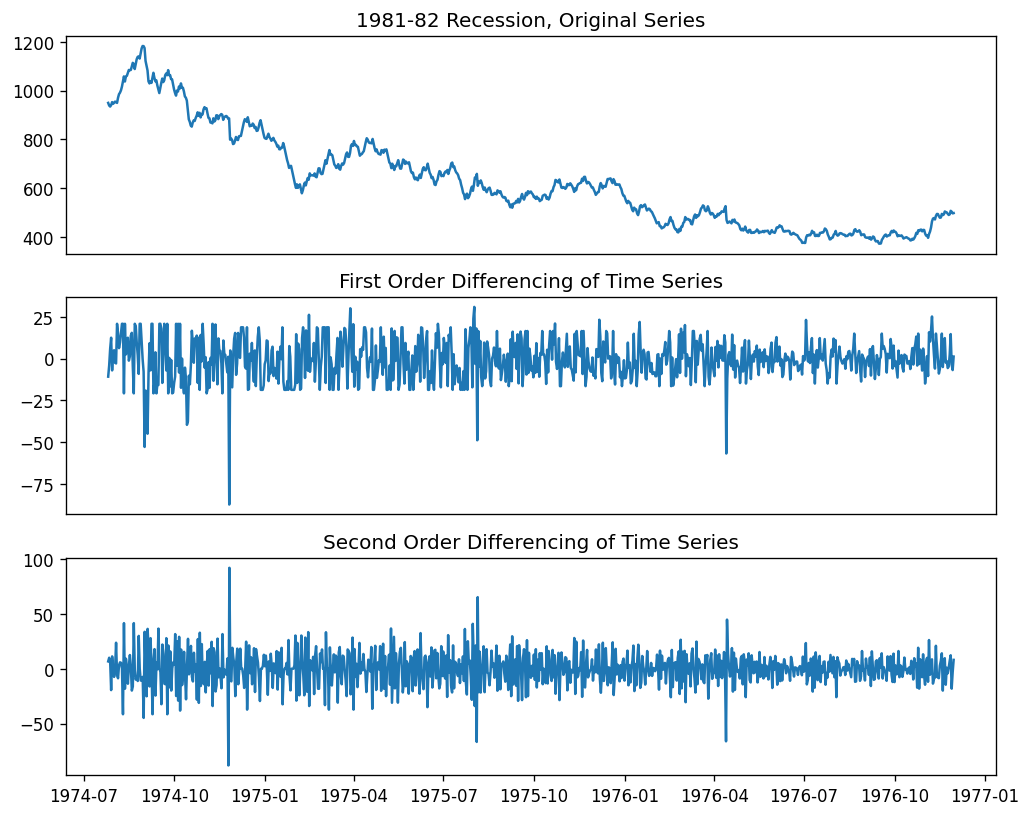

In [24]:
# Set plot parameters for multi-ax subplots
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
 
# Establish that there are three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot the original dataset 
ax1.plot(df); ax1.set_title('1981-82 Recession, Original Series'); ax1.axes.xaxis.set_visible(False)

# First Order differencing of Time Series 
ax2.plot(df.diff()); ax2.set_title('First Order Differencing of Time Series'); ax2.axes.xaxis.set_visible(False)

# Second Order Differencing of Time Series
ax3.plot(df.diff().diff()); ax3.set_title('Second Order Differencing of Time Series')

# Plot all three graphs
plt.show()

In [25]:
# Using pmdarima's ndiffs to find differencing term
# Code reference (Verma, 2021)

kpss_diffs = ndiffs(df, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(df, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


# D5 Seasonality Analysis

In [26]:
# Code Reference (Boston, 2020)
result = seasonal_decompose(df)

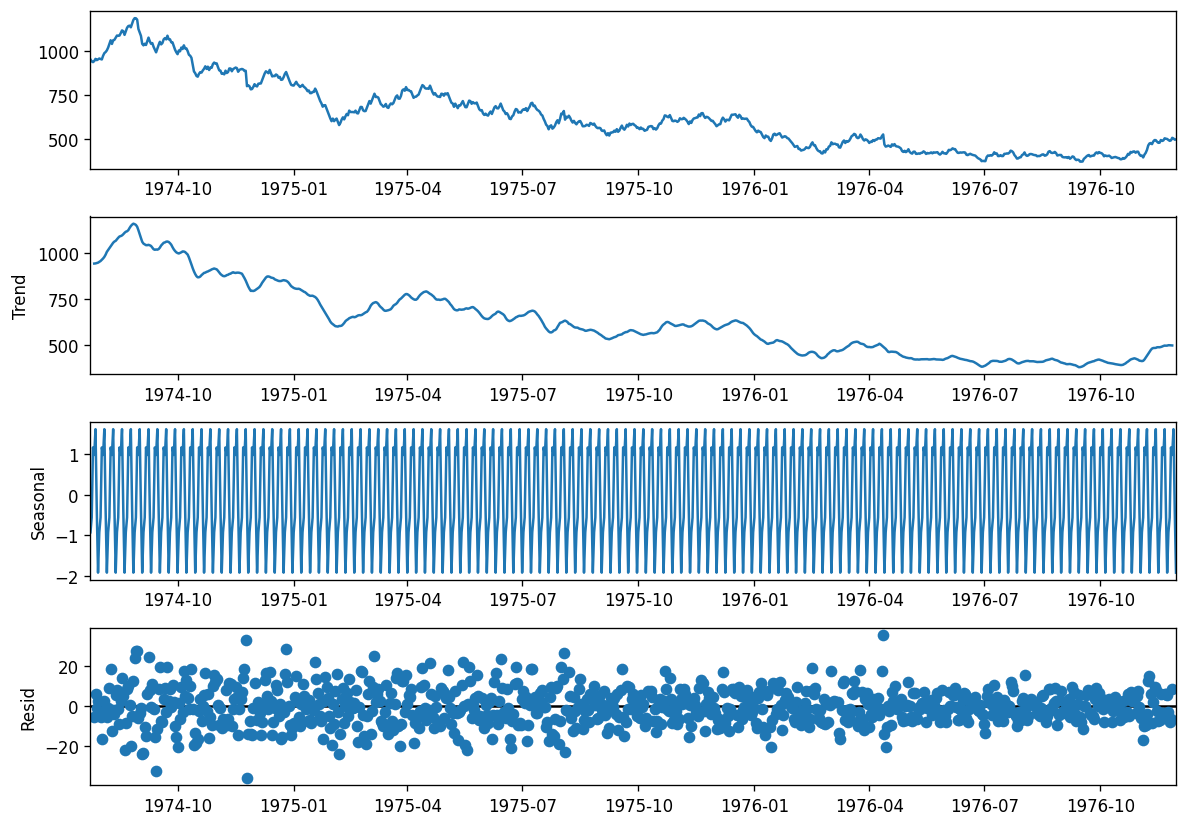

In [27]:
# plotting the result of our seasonal decomposition from the step above
rcParams['figure.figsize'] = 10,7
result.plot();

# D6 ACF and PACF

## Finding order of MA term 'q'
### Using Autocorrelation function (ACF)

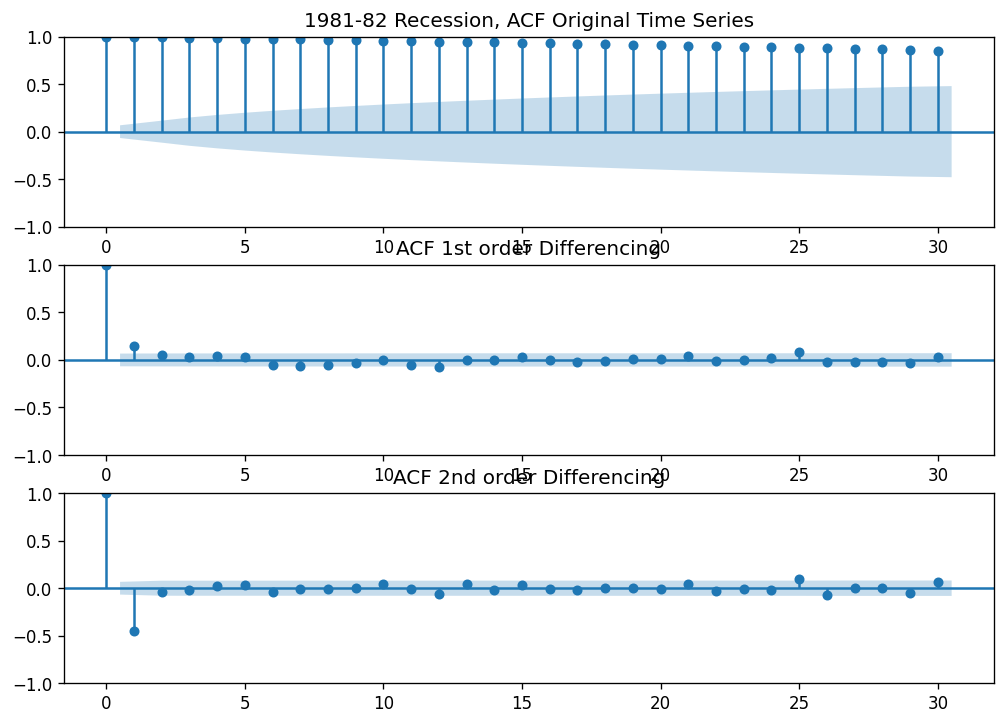

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df, ax=ax1, title='1981-82 Recession, ACF Original Time Series');
plot_acf(df.diff().dropna(), ax=ax2, title='ACF 1st order Differencing');
plot_acf(df.diff().diff().dropna(), ax=ax3, title='ACF 2nd order Differencing');

## Finding order of AR term 'p'
### Using Partial autocorrelation (PACF)

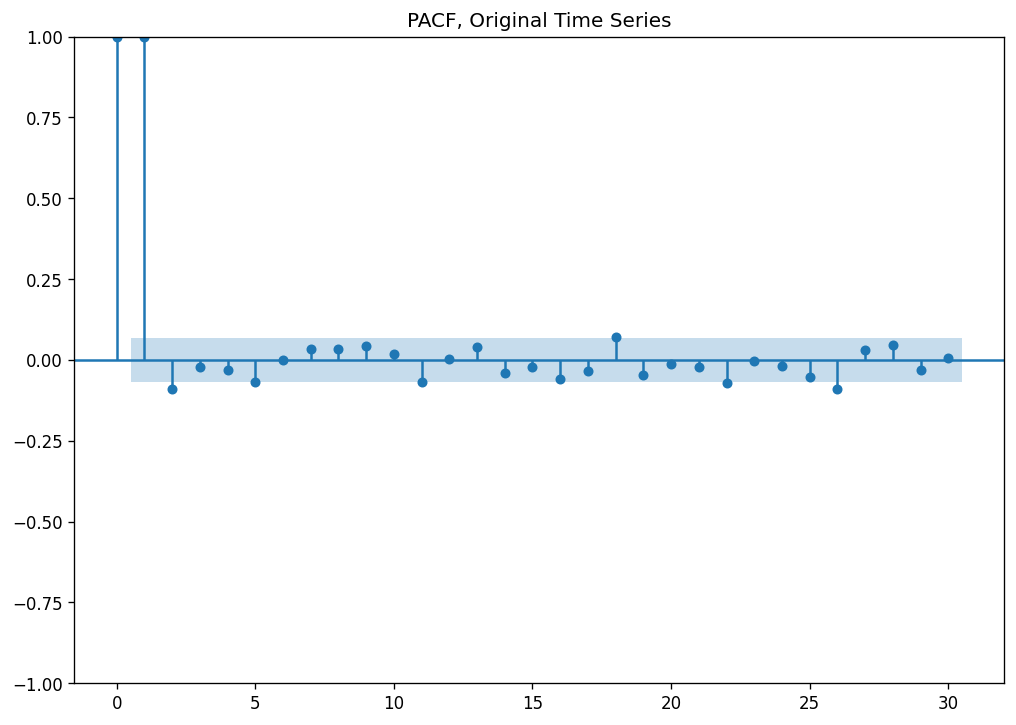

In [29]:
warnings.filterwarnings("ignore")
plot_pacf(df.dropna(), title='PACF, Original Time Series');

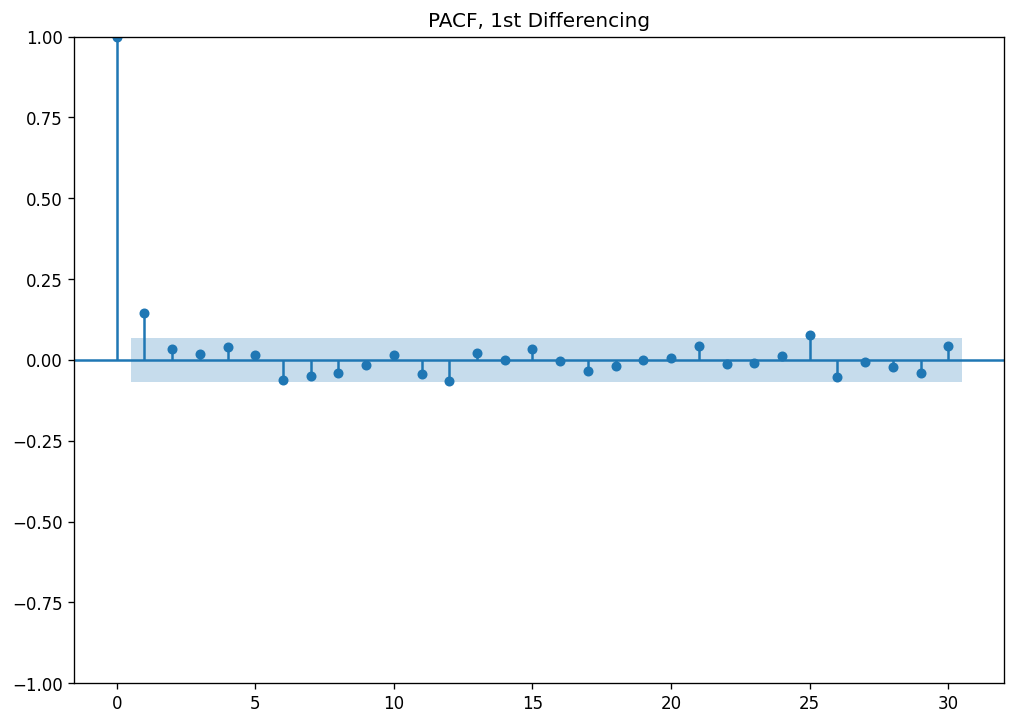

In [30]:
plot_pacf(df.diff().dropna(), title='PACF, 1st Differencing');

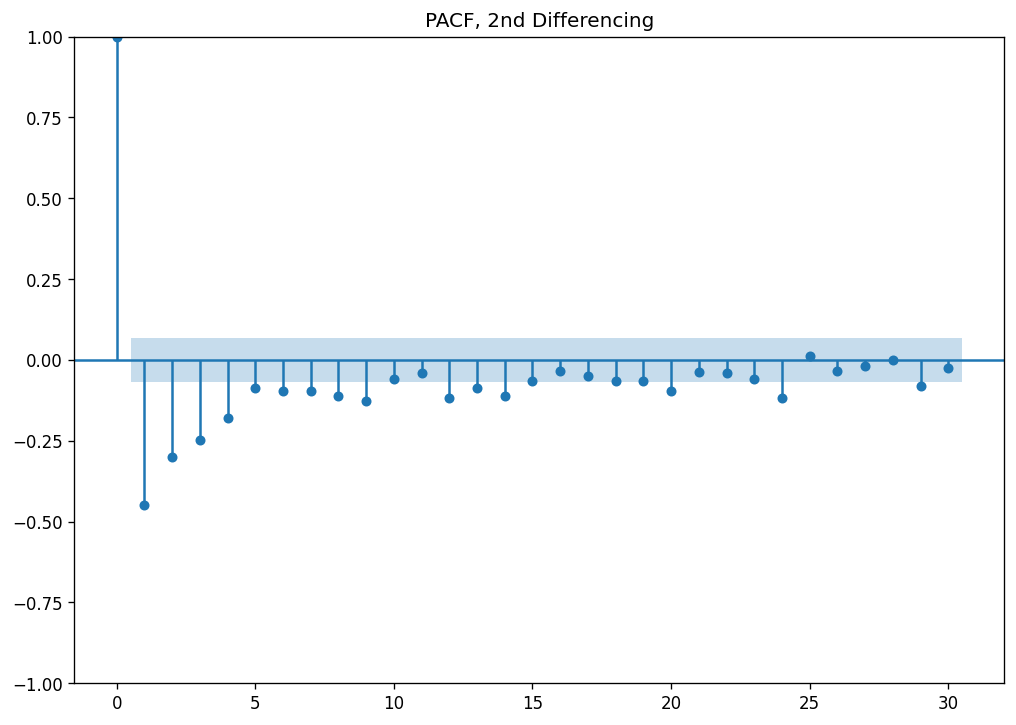

In [31]:
plot_pacf(df.diff().diff().dropna(), title='PACF, 2nd Differencing');

# D7 Spectral Density

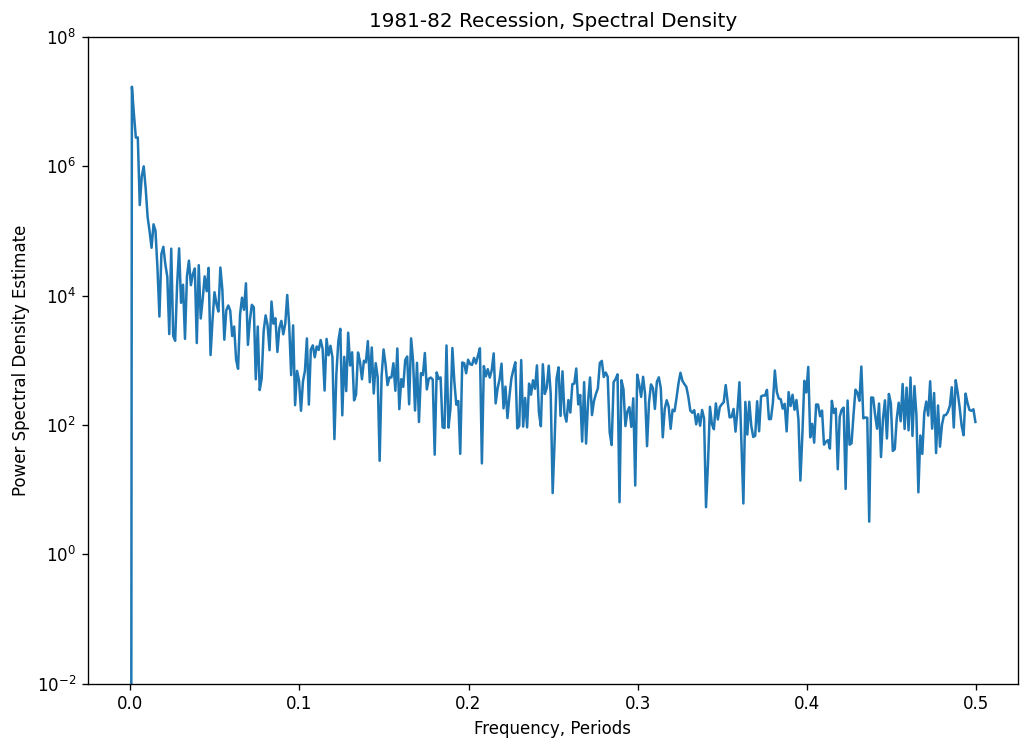

In [32]:
# Code Reference (Festus, 2022)

# signal periodogram
f, Pxx_den = signal.periodogram(df['2022_Value'])

# plotting semilogy - pyplot module used to make a plot with log scaling on the y-axis
plt.semilogy(f, Pxx_den)

# Setting coordinate values and titles for Spectral Density Graph
# setting y-axis min and max value
plt.ylim(1e-2, 1e8)

# Graph Title
plt.title('1981-82 Recession, Spectral Density')

# X label for Periods
plt.xlabel('Frequency, Periods')

# Y Label for SD Estimate
plt.ylabel('Power Spectral Density Estimate')
plt.show()

# D8 Create Train/Test Datasets

## Dataset Size = 861 cases
## 80/20 Train/Test Split
## Split is 689 / 172

In [33]:
# ------Splitting data into Test and Train sets using pmdarima's train_test_split
# code reference (Smith, 2019)

train, test = train_test_split(df, train_size=689)

In [34]:
train

,2022_Value
Trading Days,
1974-07-24,949.520
1974-07-25,938.730
1974-07-26,934.580
1974-07-27,940.390
1974-07-28,952.840
...,...
1976-06-07,444.318
1976-06-08,444.020
1976-06-09,432.994


In [35]:
test

,2022_Value
Trading Days,
1976-06-12,425.544
1976-06-13,424.352
1976-06-14,425.544
1976-06-15,426.140
1976-06-16,424.650
...,...
1976-11-26,493.190
1976-11-27,507.792
1976-11-28,504.216


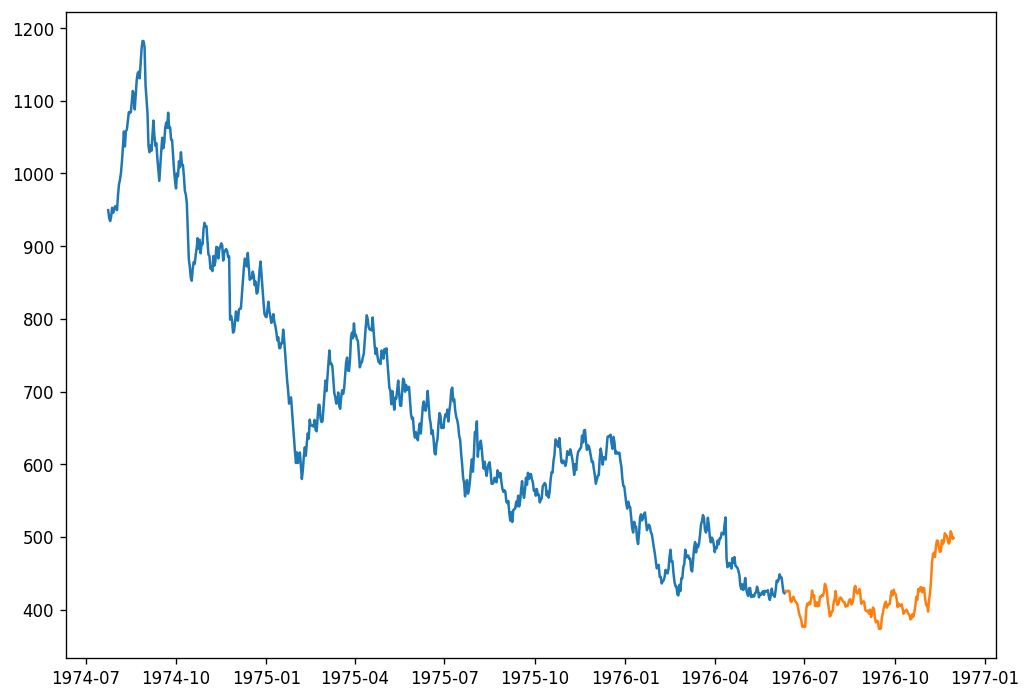

In [36]:
# Plot training data
plt.plot(train)

# Plot Test Data
plt.plot(test)

In [37]:
print(train.shape)
print(test.shape)

(689, 1)
(172, 1)


# D9 Auto-arima ARIMA Modeling
## Using pmdarima's auto_arima

In [38]:
# Fit the model using auto_arima
# Auto-arima code reference (6. Tips to using auto_arima — pmdarima 2.0.1 documentation, n.d.)
# Additional code reference (Pmdarima.arima.AutoARIMA — pmdarima 2.0.1 documentation, n.d.)
# Auto-arima, initial parameter attempt
# Code Reference (Kosaka, 2021)

# Establish auto_arima to run ARIMA and take into account
# Any Seasonality of the data, and any trends found.
model = auto_arima(train, start_p=1, start_q=1,
                   test='adf',
                   max_p=3,
                   max_q=3,
                   max_d=3,
                   seasonal=True,
                   stationarity=False,
                   seasonal_test='ocsb',
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True,
                  trend='c')

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5462.961, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5473.627, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5462.260, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5463.299, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5473.627, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5463.398, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5464.857, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5462.260, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.870 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  689
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2728.130
Date:                Wed, 19 Oct 2022   AIC                           5462.260
Time:                        15:23:2

In [39]:
model = auto_arima(train, trace=True)

# Print Summary of Best AIC Minimized SARIMAX Model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5463.210, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5473.627, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5462.260, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5463.299, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5474.054, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5463.398, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5462.961, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5464.857, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5462.103, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5463.118, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5462.566, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5463.246, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5464.447, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.450 seconds
                      

In [40]:
model.conf_int()

,0,1
ar.L1,0.072884,0.210442
sigma2,152.709179,173.963304


# Visualizing Model Results

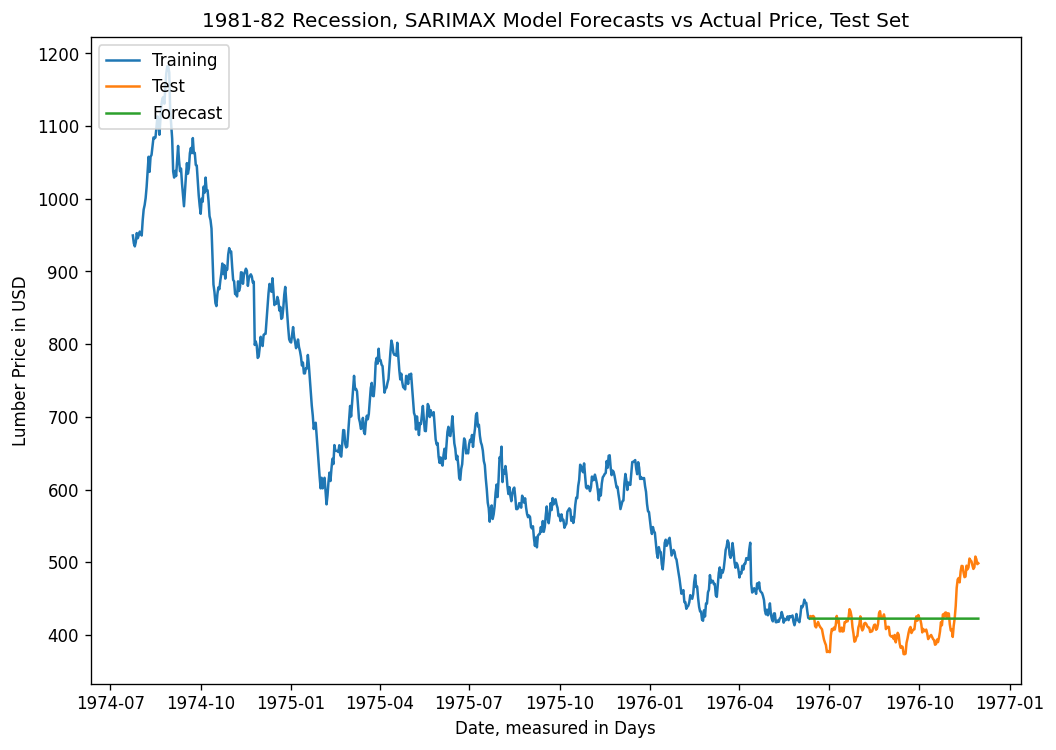

In [41]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# ------Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 172))

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date, measured in Days')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('1981-82 Recession, SARIMAX Model Forecasts vs Actual Price, Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')

# Show Plot
plt.show()

In [42]:
forecast

,forecast_prices
1976-06-12,422.437354
1976-06-13,422.419413
1976-06-14,422.416871
1976-06-15,422.416511
1976-06-16,422.416460
...,...
1976-11-26,422.416452
1976-11-27,422.416452
1976-11-28,422.416452
1976-11-29,422.416452


# D10 Accuracy Metrics for our forecast

In [43]:
# RMSE and MAE to test model accuracy

In [44]:
# Create array of actual Revenue values, stored in Test variable

test_array = test[['2022_Value']].to_numpy()
#test_array

In [45]:
test_array.shape

(172, 1)

In [46]:
forecast

,forecast_prices
1976-06-12,422.437354
1976-06-13,422.419413
1976-06-14,422.416871
1976-06-15,422.416511
1976-06-16,422.416460
...,...
1976-11-26,422.416452
1976-11-27,422.416452
1976-11-28,422.416452
1976-11-29,422.416452


In [47]:
# Predictions to numpy array
predicted_array = forecast[['forecast_prices']].to_numpy()

In [48]:
predicted_array.shape

(172, 1)

In [49]:
#RMSE Calculation

rmse = sqrt(mean_squared_error(test_array, predicted_array))
print ('RMSE = ' + str(rmse))

RMSE = 31.54283940539119


In [50]:
# MAE Calculation

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

true = test_array
predicted = predicted_array

print(mae(true, predicted))

23.29469340238698


# D11 Visualizing Model Forecast Confidence Intervals at 20% CI

In [51]:
# Model Standard Error calculations, computed numerical Hessian

std_error = model.bse()
print(std_error)

ar.L1     0.035092
sigma2    5.422070
dtype: float64


In [52]:
# Generate Model confidence intervals

conf_int = model.conf_int()

In [53]:
# ------Generate Forecast Prediction Intervals at 90% Confidence

y_forec, conf_int = model.predict(172, return_conf_int=True, alpha=0.8)
print(conf_int)

[[419.1995     425.67520741]
 [417.50534342 427.33348193]
 [416.22840871 428.60533349]
 [415.16976069 429.66326142]
 [414.24678743 430.58613267]
 [413.41794716 431.41495849]
 [412.65925676 432.17364684]
 [411.95544626 432.87745705]
 [411.29609117 433.5368121 ]
 [410.67370067 434.15920259]
 [410.08267753 434.75022574]
 [409.51870892 435.31419435]
 [408.97838813 435.85451513]
 [408.45896855 436.37393472]
 [407.95819733 436.87470594]
 [407.47419943 437.35870384]
 [407.00539442 437.82750885]
 [406.5504355  438.28246777]
 [406.10816382 438.72473945]
 [405.67757369 439.15532958]
 [405.25778565 439.57511762]
 [404.84802535 439.98487791]
 [404.44760678 440.38529648]
 [404.05591872 440.77698454]
 [403.67241385 441.16048941]
 [403.29659976 441.53630351]
 [402.9280315  441.90487176]
 [402.56630547 442.2665978 ]
 [402.21105418 442.62184908]
 [401.86194192 442.97096135]
 [401.518661   443.31424226]
 [401.18092864 443.65197462]
 [400.84848418 443.98441909]
 [400.52108674 444.31181652]
 [400.19851323

In [54]:
# Assign Predictions to pandas DataFrame

conf_pd = pd.DataFrame(conf_int, columns =['Low_Prediction','High_Prediction'])

#Assign Low predictions to variable
low_prediction = conf_pd['Low_Prediction']

#Assign High predictions to variable
high_prediction = conf_pd['High_Prediction']

In [55]:
# Read out Test and Train sets to csv file
# Open csv files in Google Sheets, Add Day Column
# Dates align with 'test' variable, which contains actual revenue figures

low_prediction.to_csv('C:/Users/ericy/Desktop/Low_Prediction.csv')
high_prediction.to_csv('C:/Users/ericy/Desktop/High_Prediction.csv')

In [56]:
#-----Load predictions, date column added

low_pred = pd.read_csv('C:/Users/ericy/Desktop/1981-1982_Low_Prediction.csv')
high_pred = pd.read_csv('C:/Users/ericy/Desktop/1981-1982_High_Prediction.csv')

In [57]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
low_pred

,Date,Low_Prediction
0,1976-06-12,419.199500
1,1976-06-13,417.505343
2,1976-06-14,416.228409
3,1976-06-15,415.169761
4,1976-06-16,414.246787
...,...,...
167,1976-11-26,373.567726
168,1976-11-27,373.422291
169,1976-11-28,373.277286
170,1976-11-29,373.132708


In [58]:
# Variable exploration to ensure compatability with 'test' datetime timeframe
high_pred

,Date,High_Prediction
0,1976-06-12,425.675207
1,1976-06-13,427.333482
2,1976-06-14,428.605333
3,1976-06-15,429.663261
4,1976-06-16,430.586133
...,...,...
167,1976-11-26,471.265177
168,1976-11-27,471.410612
169,1976-11-28,471.555617
170,1976-11-29,471.700195


## Convert Low and High Prediction 'Day' column to datetime and index

In [59]:
# Lower Predictions, Set Day as Index
low_pred['Date'] = pd.to_datetime(low_pred['Date'])

In [60]:
low_pred.set_index('Date',inplace=True)

In [61]:
# High Predictions, Day to datetime
high_pred['Date'] = pd.to_datetime(high_pred['Date'])

In [62]:
# High Predictions, Set Day as Index
high_pred.set_index('Date',inplace=True)

In [63]:
low_pred

,Low_Prediction
Date,
1976-06-12,419.199500
1976-06-13,417.505343
1976-06-14,416.228409
1976-06-15,415.169761
1976-06-16,414.246787
...,...
1976-11-26,373.567726
1976-11-27,373.422291
1976-11-28,373.277286


In [64]:
high_pred

,High_Prediction
Date,
1976-06-12,425.675207
1976-06-13,427.333482
1976-06-14,428.605333
1976-06-15,429.663261
1976-06-16,430.586133
...,...
1976-11-26,471.265177
1976-11-27,471.410612
1976-11-28,471.555617


# SARIMAX Model Forecast, With Confidence Interval = 20%, Vs Test Set

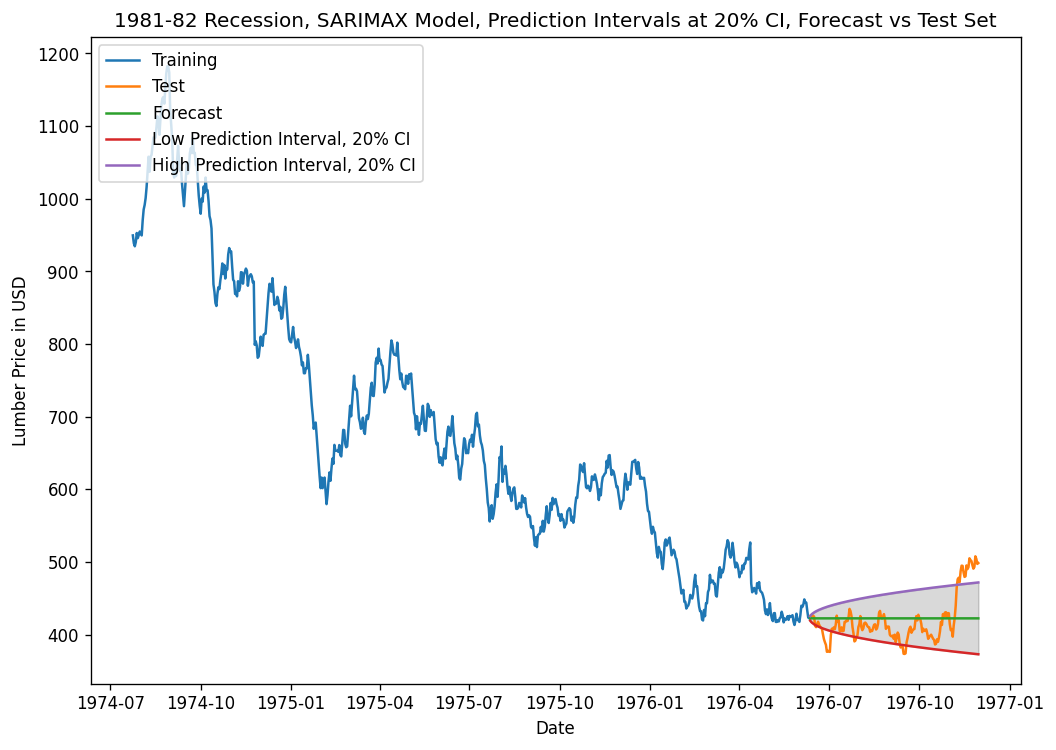

In [65]:
# Prediction assignment, predicted revenue column named
# Training, Test, and Predicted data plotted together
# Code Reference (Matplotlib.pyplot.plot — Matplotlib 3.6.0 documentation, n.d.)

# -----Creating varible with forecast values
forecast = pd.DataFrame(model.predict(n_periods = 172),index=test.index)

# Naming forecast_revenue column in forecast variable
forecast.columns = ['forecast_prices']

# Establish plot parameters for Forecast

# Plot figure size
plt.figure(figsize=(10,7))

# Training data
plt.plot(train,label="Training")

# Annotate X-axis label
plt.xlabel('Date')

# Annotate Y-axis label
plt.ylabel('Lumber Price in USD')

# Annotate Plot Title
plt.title('1981-82 Recession, SARIMAX Model, Prediction Intervals at 20% CI, Forecast vs Test Set')

# Plot Test Data
plt.plot(test,label="Test")

# Plot Forecast Data
plt.plot(forecast,label="Forecast")

# Add Prediction Interval at 95% CI
plt.plot(low_pred,label='Low Prediction Interval, 20% CI')
plt.plot(high_pred,label='High Prediction Interval, 20% CI')
plt.fill_between(low_pred.index, low_pred['Low_Prediction'], high_pred['High_Prediction'], color='k', alpha=.15)

# Plot legend in upper lefthand corner
plt.legend(loc = 'upper left')


# Show Plot
plt.show()

# Is the null hypothesis Accepted or Rejected?

In [66]:
# Accept or reject the Null Hypothesis
# 1981-1982 Recession we Accept the Null Hypothesis

In [67]:
test.to_csv('C:/Users/ericy/Desktop/1980test.csv')
